In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

np. __version__

'1.24.3'

In [274]:
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')

train_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1.0,0,3,0,6,0,1,18.9000,0.466525,56.87505,0.368167,1022,1,1424,1693,3117
596,81,22.03.2011,NaN,0,3,0,2,1,1,17.6667,0.440642,93.68745,0.225750,551,0,460,2243,2703
597,377,12.01.2012,1.0,1,1,0,4,1,2,15.3000,0.381938,120.43755,0.180967,520,0,269,3828,4097
598,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894


In [275]:
train_df.info()
#testdata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          600 non-null    int64  
 1   dteday           600 non-null    object 
 2   season           538 non-null    float64
 3   yr               600 non-null    int64  
 4   mnth             600 non-null    int64  
 5   holiday          600 non-null    int64  
 6   weekday          600 non-null    int64  
 7   workingday       600 non-null    int64  
 8   weathersit       600 non-null    int64  
 9   temp             600 non-null    float64
 10  atemp            600 non-null    float64
 11  hum              566 non-null    float64
 12  windspeed        600 non-null    float64
 13  leaflets         600 non-null    int64  
 14  price reduction  600 non-null    int64  
 15  casual           600 non-null    int64  
 16  registered       600 non-null    int64  
 17  cnt             

In [276]:
sorted_df = train_df.sort_values(by=['instant'])


train_df = sorted_df.set_index('instant')

train_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,NaN,0,1,0,6,0,2,13.7667,0.363625,120.87495,0.160446,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,104.41305,0.248539,837,1,131,670,801
3,03.01.2011,NaN,0,1,0,1,1,1,7.8546,0.189405,65.59095,0.248309,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,88.56525,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,65.54355,0.186900,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,123.49995,0.316546,701,0,9,432,441
727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,97.93755,0.350133,561,0,247,1867,2114
728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,88.50000,0.155471,562,0,644,2451,3095


In [277]:
#hum has to many outliers
print(len(train_df[train_df["hum"] > 100]))
print(len(train_df[train_df["windspeed"] < 0]))

229
4


In [278]:
train_df = train_df.drop('hum', axis=1)

In [279]:
train_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,01.01.2011,NaN,0,1,0,6,0,2,13.7667,0.363625,0.160446,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,0.248539,837,1,131,670,801
3,03.01.2011,NaN,0,1,0,1,1,1,7.8546,0.189405,0.248309,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,0.186900,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,0.316546,701,0,9,432,441
727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,0.350133,561,0,247,1867,2114
728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,0.155471,562,0,644,2451,3095


In [280]:
#from sklearn.impute import SimpleImputer

#imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#handled_season = imp_most_freq.fit_transform(train_df['season'].to_numpy().reshape(-1, 1))

#handled_season

#train_df['season'] = handled_season

#imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

#handled_hum = imp_median.fit_transform(train_df['hum'].to_numpy().reshape(-1, 1))

#train_df['hum'] = handled_hum 

#testdata

In [281]:
#median_hum = train_df['hum'].drop(train_df[train_df['hum'] > 100].index)
#median_hum.median()

In [282]:
#fixing every 

for i in train_df['windspeed']:
    if i < 0:
        train_df['windspeed'] = train_df['windspeed'].replace(i, train_df['windspeed'].median())

for i in train_df['season']:
    if np.isnan(i):
        for j in train_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                train_df['season'] = train_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                train_df['season'] = train_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                train_df['season'] = train_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                train_df['season'] = train_df['season'].replace(i, 4)



#for i in handeled_df['hum']:
#    if i > 100:
#        handeled_df['hum'] = handeled_df['hum'].replace(i, 100)


#handeled_df[['windspeed', 'hum']].describe()


#handeled_df['hum'] = handeled_df['hum'].drop(handeled_df[handeled_df['hum'] > 100].index)
#handeled_df.describe()

In [283]:
train_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,01.01.2011,1.0,0,1,0,6,0,2,13.7667,0.363625,0.160446,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,0.248539,837,1,131,670,801
3,03.01.2011,1.0,0,1,0,1,1,1,7.8546,0.189405,0.248309,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,0.186900,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,0.316546,701,0,9,432,441
727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,0.350133,561,0,247,1867,2114
728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,0.155471,562,0,644,2451,3095


In [284]:
train_df['weekday']
#testdata

instant
1      6
2      0
3      1
4      2
5      3
      ..
726    3
727    4
728    5
729    6
731    1
Name: weekday, Length: 600, dtype: int64

In [285]:
train_df['weekday'] = pd.to_datetime(train_df['dteday'], format="%d.%M.%Y").dt.dayofweek

train_df['weekday']

#testdata

instant
1      5
2      6
3      0
4      1
5      2
      ..
726    3
727    4
728    5
729    6
731    1
Name: weekday, Length: 600, dtype: int32

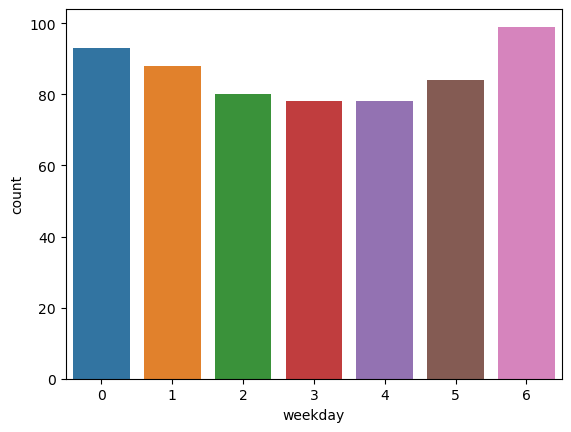

In [286]:
sns.countplot(x='weekday', data=train_df)
plt.show()
#testdata


In [287]:
train_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction,casual,registered,cnt
count,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2.288333,0.496667,6.475000,0.03000,3.013333,0.680000,1.401667,19.808284,0.473620,0.191569,740.065000,0.150000,1070.895000,3634.116667,4705.011667
std,1.136082,0.500406,3.442741,0.17073,2.072917,0.466865,0.542360,7.206843,0.160439,0.079188,164.430095,0.357369,2971.316154,1538.698254,3588.750428
min,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,2.365200,0.079070,0.022392,459.000000,0.000000,2.000000,20.000000,22.000000
25%,1.000000,0.000000,4.000000,0.00000,1.000000,0.000000,1.000000,13.575000,0.338256,0.134953,600.750000,0.000000,313.000000,2499.000000,3135.000000
50%,2.000000,0.000000,6.000000,0.00000,3.000000,1.000000,1.000000,20.100000,0.489690,0.180973,737.000000,0.000000,722.000000,3657.000000,4530.000000
75%,3.000000,1.000000,9.000000,0.00000,5.000000,1.000000,2.000000,26.058300,0.605127,0.233947,875.500000,0.000000,1078.000000,4680.250000,5909.500000
max,4.000000,1.000000,12.000000,1.00000,6.000000,1.000000,3.000000,34.466700,0.826371,0.507463,1032.000000,1.000000,47138.000000,6946.000000,53021.000000


In [288]:
train_df = train_df.astype({'yr':'float', 'mnth':'float', 'holiday':'float', 'weekday':'float', 'workingday':'float', 'weathersit':'float', 'leaflets':'float',  'price reduction':'float',  'casual':'float',  'registered':'float',  'cnt':'float'})

In [289]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 1 to 731
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dteday           600 non-null    object 
 1   season           600 non-null    float64
 2   yr               600 non-null    float64
 3   mnth             600 non-null    float64
 4   holiday          600 non-null    float64
 5   weekday          600 non-null    float64
 6   workingday       600 non-null    float64
 7   weathersit       600 non-null    float64
 8   temp             600 non-null    float64
 9   atemp            600 non-null    float64
 10  windspeed        600 non-null    float64
 11  leaflets         600 non-null    float64
 12  price reduction  600 non-null    float64
 13  casual           600 non-null    float64
 14  registered       600 non-null    float64
 15  cnt              600 non-null    float64
dtypes: float64(15), object(1)
memory usage: 79.7+ KB


In [290]:
import scipy as stats

def calculateMahalanobis(y=None, data=None, cov=None):
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
        inv_covmat = np.linalg.inv(cov)
        left = np.dot(y_mu, inv_covmat)
        mahal = np.dot(left, y_mu.T)
        return mahal.diagonal()
    
train_df['calculateMahalanobis'] = calculateMahalanobis(y=train_df.iloc[:, 2:], 
                                                  data=train_df.iloc[:, 2:])

train_df[['casual', 'calculateMahalanobis']]

,casual,calculateMahalanobis
instant,,
1,331.0,1.298379e+15
2,131.0,1.298379e+15
3,120.0,1.298379e+15
4,108.0,1.298379e+15
5,82.0,1.298379e+15
...,...,...
726,9.0,1.298379e+15
727,247.0,1.298379e+15
728,644.0,1.298379e+15


In [291]:
#from scipy import stats

#train_df[np.abs(stats.zscore(train_df['casual'])) < 18]

In [292]:
#filter the df based on the quantile (still have to figure out, which quantile percentage is the right one)
q = train_df["casual"].quantile(0.95)

#q = train_df.iloc[:, 2:].quantile(0.9)
print(q)
handeled_df = train_df[train_df['casual'] < q]

2455.999999999998


In [293]:
handeled_df['windspeed'].describe()

count    570.000000
mean       0.192206
std        0.079999
min        0.022392
25%        0.134954
50%        0.180973
75%        0.234419
max        0.507463
Name: windspeed, dtype: float64

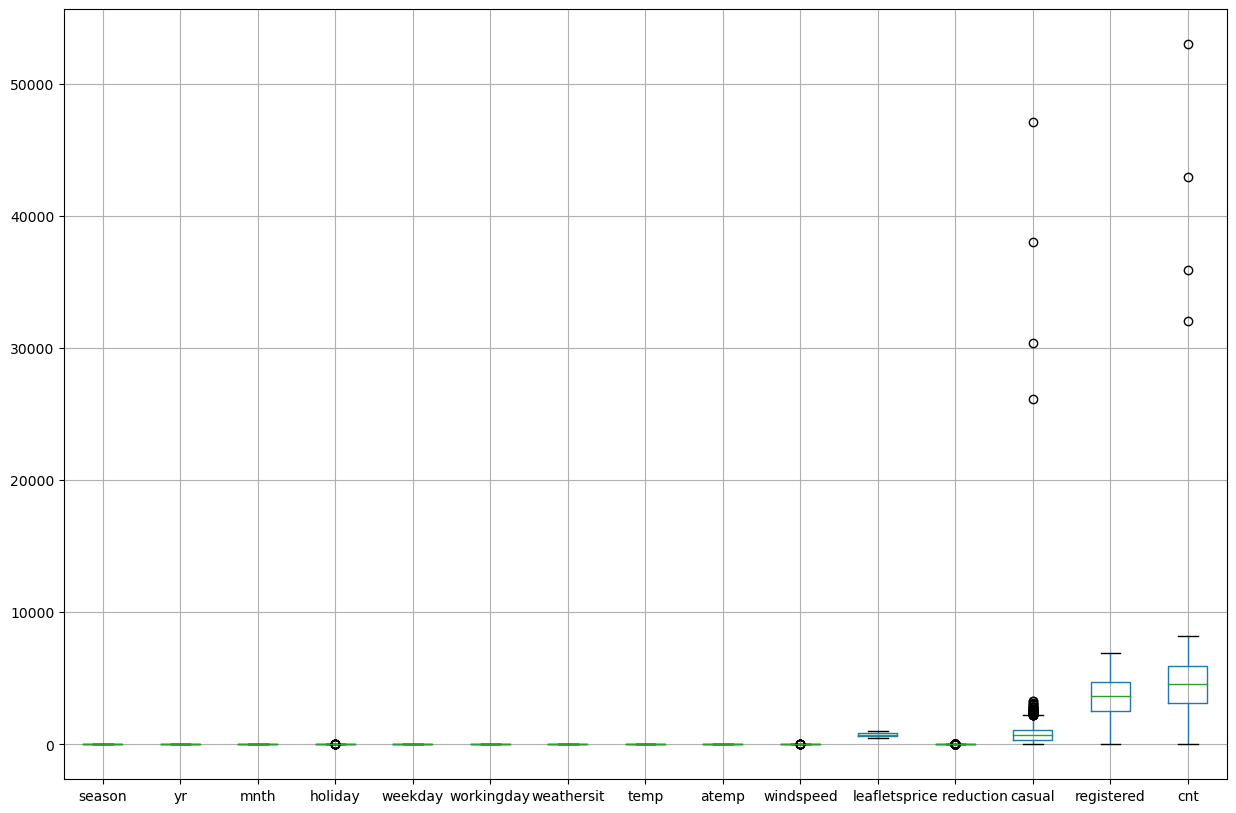

In [294]:
boxplot = train_df.iloc[:, 1:-1].boxplot(figsize=(15, 10))
plt.show()

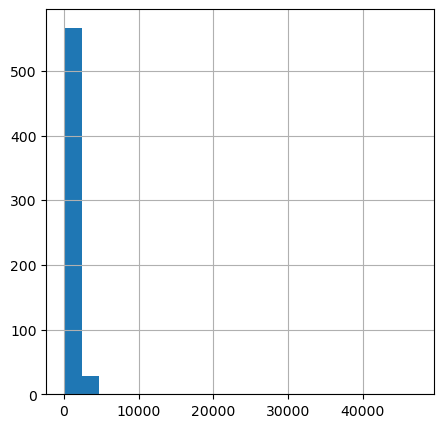

In [295]:
hist = train_df['casual'].hist(bins=20,figsize=(5, 5))

In [296]:
q = train_df["casual"].quantile(0.957)

#q = train_df.iloc[:, 2:].quantile(0.9)
print(q)
handeled_df = train_df[train_df['casual'] < q]

2543.4300000000003


In [297]:
handeled_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction,casual,registered,cnt,calculateMahalanobis
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,1.0,0.0,1.0,0.0,5.0,0.0,2.0,13.7667,0.363625,0.160446,755.0,0.0,331.0,654.0,985.0,1.298379e+15
2,02.01.2011,1.0,0.0,1.0,0.0,6.0,0.0,2.0,14.5391,0.353739,0.248539,837.0,1.0,131.0,670.0,801.0,1.298379e+15
3,03.01.2011,1.0,0.0,1.0,0.0,0.0,1.0,1.0,7.8546,0.189405,0.248309,829.0,0.0,120.0,1229.0,1349.0,1.298379e+15
4,04.01.2011,1.0,0.0,1.0,0.0,1.0,1.0,1.0,8.0000,0.212122,0.160296,734.0,0.0,108.0,1454.0,1562.0,1.298379e+15
5,05.01.2011,1.0,0.0,1.0,0.0,2.0,1.0,1.0,9.0783,0.229270,0.186900,745.0,0.0,82.0,1518.0,1600.0,1.298379e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1.0,12.0,0.0,3.0,1.0,3.0,9.7333,0.220333,0.316546,701.0,0.0,9.0,432.0,441.0,1.298379e+15
727,27.12.2012,1.0,1.0,12.0,0.0,4.0,1.0,2.0,10.1667,0.226642,0.350133,561.0,0.0,247.0,1867.0,2114.0,1.298379e+15
728,28.12.2012,1.0,1.0,12.0,0.0,5.0,1.0,2.0,10.1333,0.255046,0.155471,562.0,0.0,644.0,2451.0,3095.0,1.298379e+15


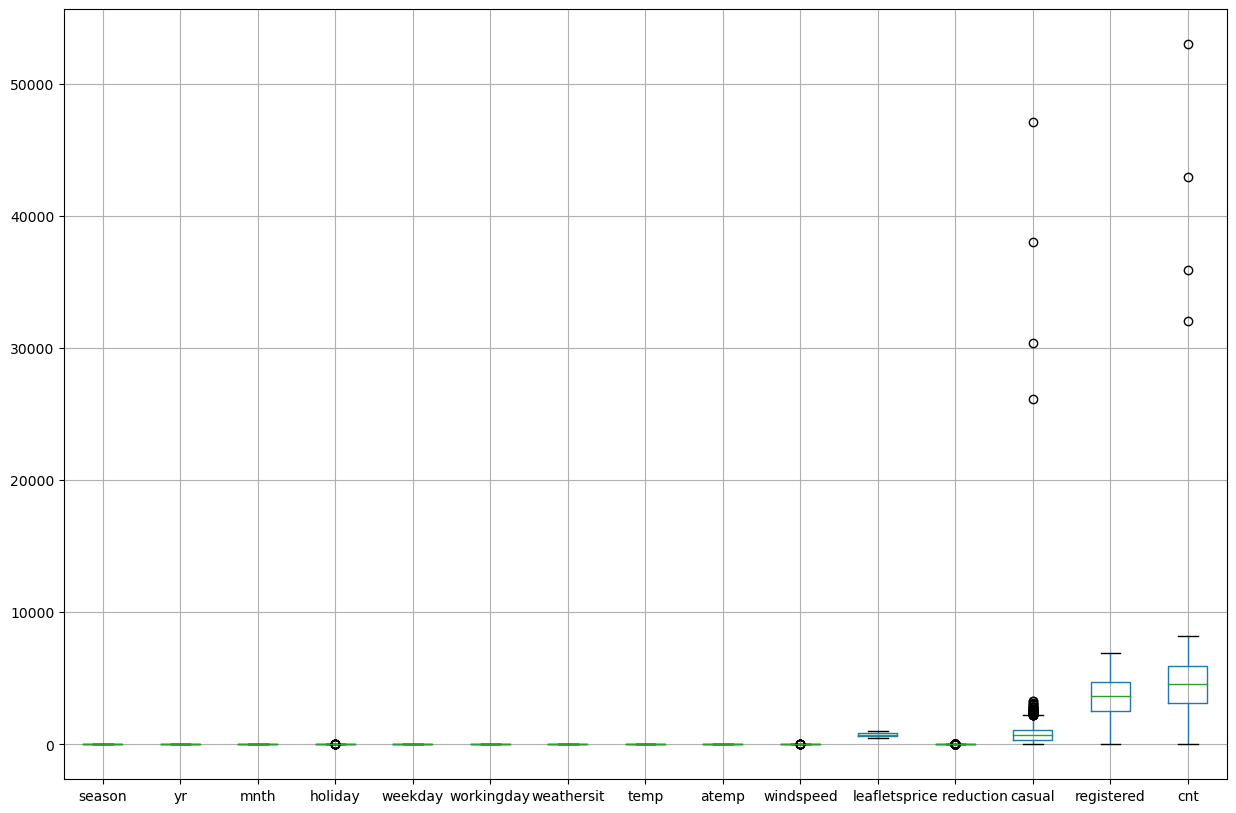

In [298]:
boxplot = train_df.iloc[:, 1:-1].boxplot(figsize=(15, 10))
plt.show()

In [299]:
q = handeled_df["casual"].quantile(0.95)

#q = train_df.iloc[:, 2:].quantile(0.9)
print(q)
handeled_df_2 = train_df[train_df['casual'] < q]

2005.9000000000003


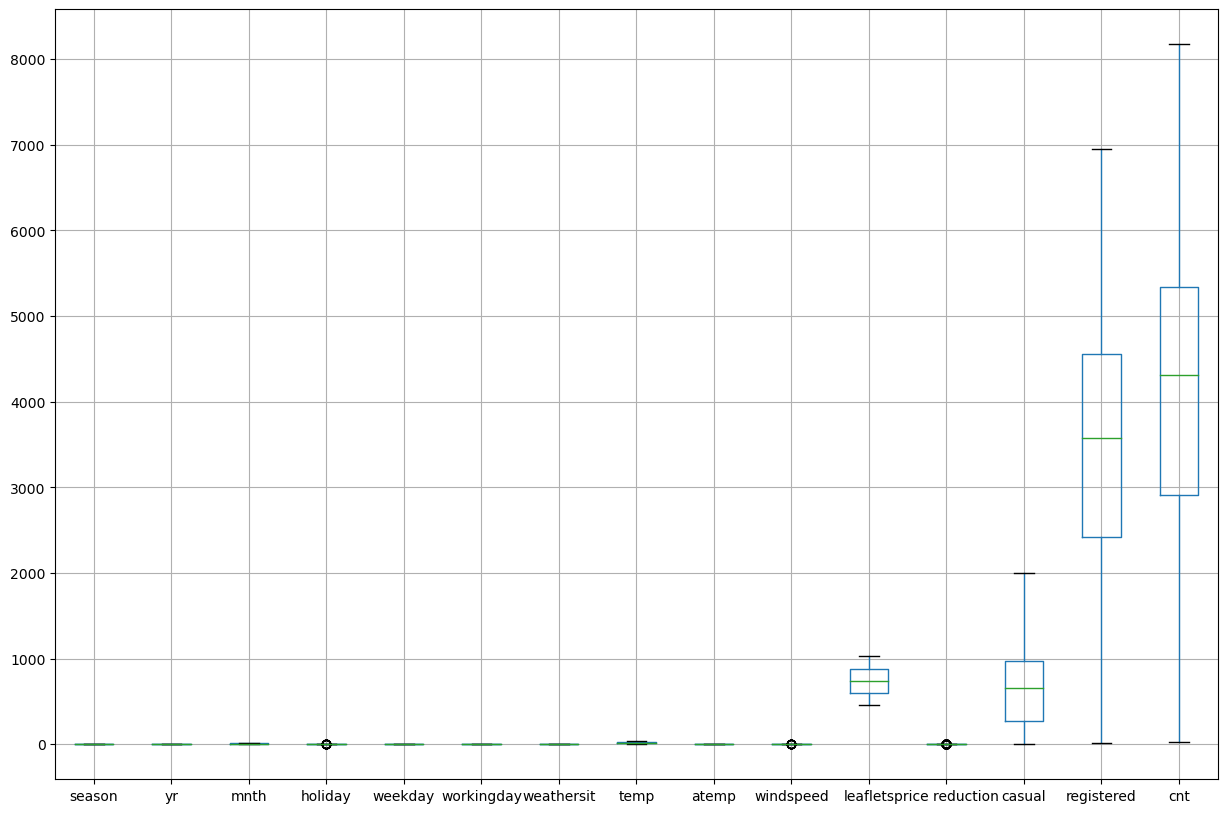

In [300]:
boxplot = handeled_df_2.iloc[:, 1:-1].boxplot(figsize=(15, 10))
plt.show()

In [301]:
handeled_df_2

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction,casual,registered,cnt,calculateMahalanobis
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,1.0,0.0,1.0,0.0,5.0,0.0,2.0,13.7667,0.363625,0.160446,755.0,0.0,331.0,654.0,985.0,1.298379e+15
2,02.01.2011,1.0,0.0,1.0,0.0,6.0,0.0,2.0,14.5391,0.353739,0.248539,837.0,1.0,131.0,670.0,801.0,1.298379e+15
3,03.01.2011,1.0,0.0,1.0,0.0,0.0,1.0,1.0,7.8546,0.189405,0.248309,829.0,0.0,120.0,1229.0,1349.0,1.298379e+15
4,04.01.2011,1.0,0.0,1.0,0.0,1.0,1.0,1.0,8.0000,0.212122,0.160296,734.0,0.0,108.0,1454.0,1562.0,1.298379e+15
5,05.01.2011,1.0,0.0,1.0,0.0,2.0,1.0,1.0,9.0783,0.229270,0.186900,745.0,0.0,82.0,1518.0,1600.0,1.298379e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1.0,12.0,0.0,3.0,1.0,3.0,9.7333,0.220333,0.316546,701.0,0.0,9.0,432.0,441.0,1.298379e+15
727,27.12.2012,1.0,1.0,12.0,0.0,4.0,1.0,2.0,10.1667,0.226642,0.350133,561.0,0.0,247.0,1867.0,2114.0,1.298379e+15
728,28.12.2012,1.0,1.0,12.0,0.0,5.0,1.0,2.0,10.1333,0.255046,0.155471,562.0,0.0,644.0,2451.0,3095.0,1.298379e+15


In [302]:
handeled_df_2[['holiday', 'workingday', 'windspeed', 'price reduction']].describe()

,holiday,workingday,windspeed,price reduction
count,545.000000,545.000000,545.000000,545.000000
mean,0.027523,0.746789,0.193869,0.148624
std,0.163752,0.435250,0.080480,0.356044
min,0.000000,0.000000,0.022392,0.000000
25%,0.000000,0.000000,0.135583,0.000000
50%,0.000000,1.000000,0.182842,0.000000
75%,0.000000,1.000000,0.236937,0.000000
max,1.000000,1.000000,0.507463,1.000000


In [303]:
#q = train_df["windspeed"].quantile(0.001)
#print(q)
#q = train_df.iloc[:, 2:].quantile(0.9)
#handeled_df = train_df[train_df['casual'] < q]

In [304]:
feature_handeled_df = handeled_df.iloc[:, :13]

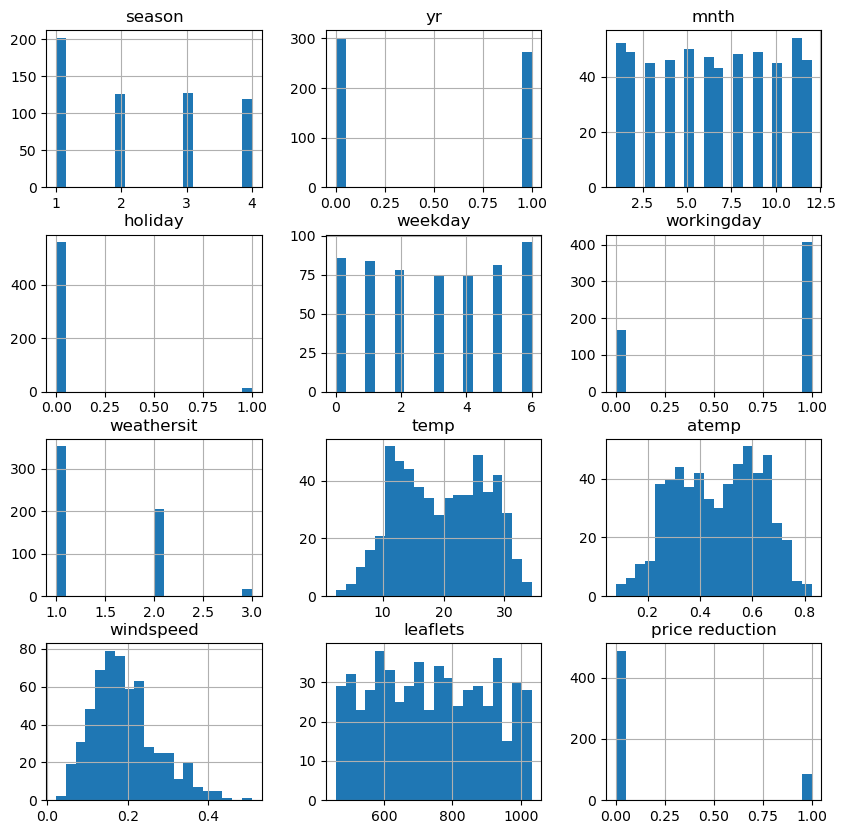

In [305]:
# histogram plot
hist = feature_handeled_df.hist(bins=20,figsize=(10, 10))
# windspeed seems to be skewed, so we will normalize this feature

In [306]:
#from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
#qqplot(feature_handeled_df['temp'], line='s')
#pyplot.show()

In [307]:
#qqplot(feature_handeled_df['atemp'], line='s')
#pyplot.show()

In [308]:
#qqplot(feature_handeled_df['windspeed'], line='s')
#pyplot.show()

In [309]:
#qqplot(feature_handeled_df['leaflets'], line='s')
#pyplot.show()

In [310]:
# Shapiro-Wilk Test
#from scipy.stats import shapiro

#def shapiro_wilk_test(data,alpha):
   # stat, p = shapiro(data)
   # print('Statistics=%.3f, p=%.5f' % (stat, p))
    # interpret
   # if p > alpha:
    #    print('Sample looks Gaussian (fail to reject H0)')
   # else:
   #     print('Sample does not look Gaussian (reject H0)')

#shapiro_wilk_test(feature_handeled_df['temp'],0.05) 

In [311]:
from sklearn.preprocessing import PowerTransformer

#pt = PowerTransformer(standardize=False)
#trans_temp= pt.fit_transform(np.array(feature_handeled_df['temp'].array.reshape(-1, 1)))


#feature_handeled_df['temp ptransformed']=trans_temp
#hist = feature_handeled_df['temp ptransformed'].hist(bins=20,figsize=(10, 10))

In [312]:
#pt = PowerTransformer(standardize=False)
#trans_temp= pt.fit_transform(np.array(feature_handeled_df['atemp'].array.reshape(-1, 1)))


#feature_handeled_df['atemp ptransformed']=trans_temp
#hist = feature_handeled_df['atemp ptransformed'].hist(bins=20,figsize=(10, 10))

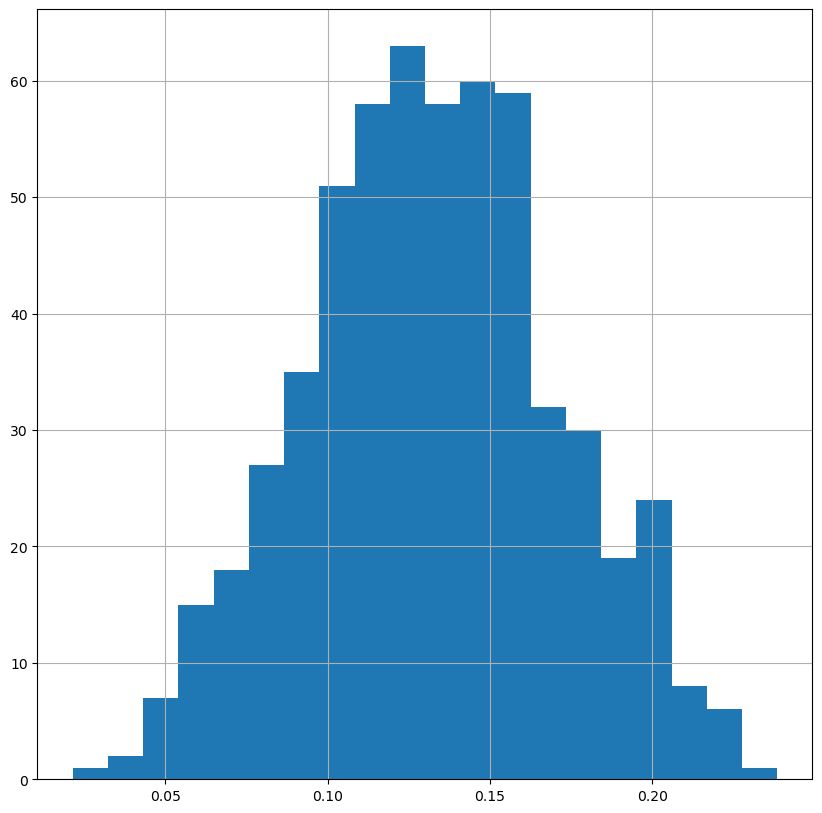

In [313]:
# Because have less than thousand samples, we use the PowerTransform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(feature_handeled_df['windspeed'].array.reshape(-1, 1)))


feature_handeled_df['windspeed ptransformed']=trans_temp
hist = feature_handeled_df['windspeed ptransformed'].hist(bins=20,figsize=(10, 10))

In [314]:
#pt = PowerTransformer(standardize=False)
#trans_temp= pt.fit_transform(np.array(feature_handeled_df['leaflets'].array.reshape(-1, 1)))


#feature_handeled_df['leaflets ptransformed']=trans_temp
#hist = feature_handeled_df['leaflets ptransformed'].hist(bins=20,figsize=(10, 10))